### Student Details

Student name: Tendai Chaka

Student ID: 20041829

# Description

In this task, we will use NSL-KDD dataset. We will use the NSL-KDD dataset to do multi-class classification. This dataset is quite large, and the training time can be quite long if you use the whole thing so that we will use just 20% of the dataset. If you completed the network security task in the previous activity (i.e., if you are in the BSc in CyberSecurity), you will have seen this already. For those that have not seen this dataset before, you will also be dealing with many more dimensions than you have done up to now, but you will see that the machine learning techniques we have employed up to now scale nicely to many dimensions.

The aim of the NSL-KDD dataset is to enable training a machine learning algorithm to identify different types of cyber attacks based on network trafiic features. The different attacks can be: denial-of-service (dos), Remote to user (r2l), probing attack (probe), User-to-Root (U2R). I hope this means something to the CyberSecurity cohort. For the rest of us, don't worry, we can just see it as a generic classification task.

The data is already split into training and testing. It also contains a mix of different types of features - categorical, binary, and numerical features. However, in this task, we are going to investigate only the numerical features. So, in the code just below, I have stripped out all of the non-numerical features, and provide you with the numpy arrays `train_X`, `train_Y`, `test_X`, and `test_Y`.

Our aim will be to use the available data to train an algorithm to predict the type of attack that is occurring. We will then see if we can get similar performance by using fewer features. Undoubtedly, unless there is a feature that has no influence *at all* on the output, we will see *some* degradation in performance. However, as discussed in the material, there are significant gains to be made by using fewer features.

In [2]:
####################
# CODE PROVIDED

# This code is a little bit complicated, and I don't want you to get bogged down in reading from csv files.
# This code reads from the CSV files, and creates the training and test sets for both binary and multi-class

# Read the data
import pandas as pd
test_df = pd.read_csv('KDDTest_CE4317.csv', header=0)
train_df = pd.read_csv('KDDTrain_CE4317.csv', header=0)

# Differentiating between nominal, binary, and numeric features
# Note, we only need to do this for the train data, as the train and test have the same feature names (of course)
col_names = train_df.columns.values    

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 19, 20]
numeric_idx = list(set(range(40)).difference(nominal_idx).difference(binary_idx))

numeric_cols = col_names[numeric_idx].tolist()   # The columns that have numerical features

train_Y = train_df['attack_category']
test_Y = test_df['attack_category']

# In this case, we are only going to use the numeric columns for our predictions
train_X = train_df[numeric_cols]   
test_X = test_df[numeric_cols]

print(train_X.shape)
print(test_X.shape)

(25192, 31)
(22544, 31)


Let's have a quick look at what some of the samples look like

In [3]:
# Let's look at the data
train_X

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,491,0,0,0,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,146,0,0,0,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,0,0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,232,8153,0,0,0,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,199,420,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,334,0,0,0,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,0,0,0,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,0,0,0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


And let's look quickly at how many samples in each attack category we have

Text(0, 0.5, 'Attack category')

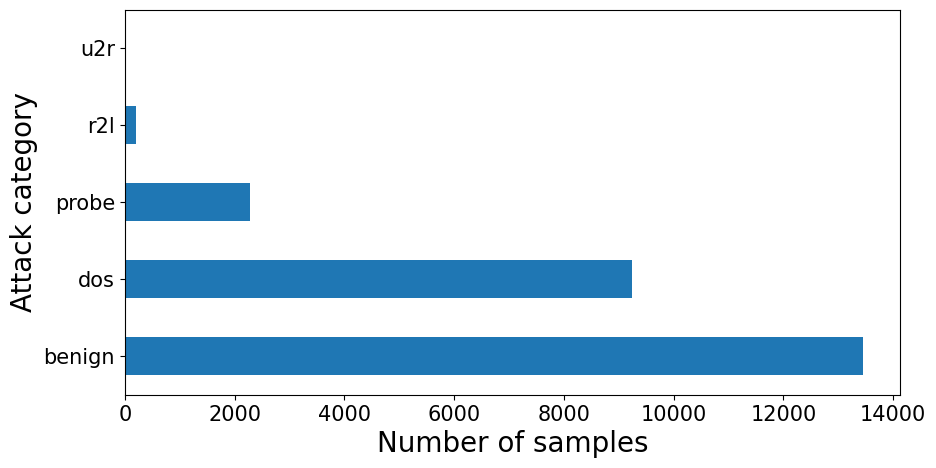

In [4]:
import matplotlib.pyplot as plt

train_attack_cats = train_df['attack_category'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()
train_attack_cats.plot(kind='barh', figsize=(10,5), fontsize=15)
plt.xlabel("Number of samples", fontsize=20)
plt.ylabel("Attack category", fontsize=20)

# Task 1- Feature Selection

### Part 1: Support Vector Classification

Here, we will use Support Vector Classification to predict the type of network attack that is occurriing, given a set of features. We will use a simple linear SVM Classification, and use the default parameters, as we're not investigating the properties of SVM, but rather the properties of data.

#### Task:
1. Apply the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to the training and test data. Remember, train on the `*_train` data, but apply to both the `*_train` and the `*_test` data
1. Train a linear Support Vector Classification, using [`sklearn`'s `svm.SVC` class](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). All parameters can be left at default except `kernel='linear'`
1. Predict the category of the network attack
1. Print the [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
1. Discuss the confusion matrix briefly

You should see that the linear SVM Classification isn't too bad. You should get an accuracy around 0.73


<span style="color:red">Insert your code below</span>.

In [5]:
from sklearn.preprocessing import StandardScaler

####################################
# Your code here
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

print(train_X_scaled)
print(test_X_scaled)


[[-0.11355066 -0.00988885 -0.03930979 ... -0.62736475 -0.22166806
  -0.37428075]
 [-0.11355066 -0.01003196 -0.03930979 ... -0.62736475 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]
 ...
 [-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  2.88429591
   2.77704096]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ...  1.61445359 -0.38513984
  -0.37428075]]
[[-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  2.88429591
   2.77704096]
 [-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  2.88429591
   2.77704096]
 [-0.1128062  -0.00470708 -0.03930979 ... -0.62736475 -0.38513984
  -0.37428075]
 ...
 [-0.11355066  0.01253107  0.05428582 ... -0.62736475 -0.15627934
  -0.15368823]
 [-0.11355066 -0.0100751  -0.03883697 ... -0.62736475 -0.38513984
  -0.37428075]
 [-0.11355066 -0.01009252 -0.03930979 ... -0.62736475  1.05341189
   2.77704096]]


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

####################
# YOUR CODE
# Create an SVC model with a linear kernel
model = SVC(kernel='linear')

# Fit the model to the training data
model.fit(train_X_scaled, train_Y)

# Prediction
prediction = model.predict(test_X_scaled)

# Calculate the confusion matrix
confusion = confusion_matrix(test_Y, prediction)

# Calculate the accuracy score
accuracy = accuracy_score(test_Y, prediction)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion)

print("Accuracy Score:", accuracy)



Confusion Matrix:
[[9085  472  150    4    0]
 [2100 5521   15    0    0]
 [ 431  128 1864    0    0]
 [2544    5   23    2    0]
 [ 156    0   38    1    5]]
Accuracy Score: 0.7308818310858765


<span style="color:red">Insert your text answers below</span>.

5. The number of correctly classified instances (True Positives) is fairly high in Class 1 (9085), Class 2 (5521) and Class 3 (1864). However Class 4 and 5 have very low true positives with 2 and 5 respectively. The class imbalance is evident, especially for Class 1, which has a large number of true positives. Other classes, particularly Class 4 and Class 5, have relatively fewer correct predictions.

### Part 2: Feature Variance

Feature variance is a rather simple way of predicting if a given feature will have influence on the outcome of a trained model. The principle is that, if a feature has low variance, it cannot have much influence on the model prediction. As an extreme, if we have a variance of 0 in a feature across all samples, i.e. we have the same value for this feature in all samples, then this feature cannot be used to distinguish samples and is useless as a predictor.

However, the converse is not true. A high variance in a feature does not necessarily mean that it is a good predictor. You could imagine a feature that just contains noise with high amplitude. It might have high variance, but is meaningless. Or you can have a feature that has high variance but no influence on the outcome. For example, would hair length in cm have any influence on a baseball players salary? That said, variance can be a useful measure of the strength of a predictor.

The variance of a set of features is given by:

$$
S_{i}^{2} = \frac{\sum_{j=1}^n\left(\textbf{X}_{i,j} - \overline{\textbf{X}}_i \right)^2}{n - 1}
$$

where $\textbf{X}_{i,j}$ is the $j$'th sample of the $i$'th feature, $\overline{\textbf{X}}_i$ is the mean of all the samples of the $i$'th feature, and $n$ is the total number of samples.

Variance thresholding doesn't examine the relationship between the feature $\textbf{X}$ and the output $\textbf{y}$. This has the disadvantage that you can't test if the feature actually has an influence on the output. However, even though in this case we use it in a supervised learning context, it does mean that we can use variance thresholding for unsupervised learning.

#### Notes:
1. In Part 1, we used the `StandardScaler` to scale the features. In general, this is good practice, and in the next Task where we look at PCAs, really is even required. The `StandardScaler` will make it so every feature has a variance of 1 (unless the features started out with a variance of 0 to begin with) and a mean of 0. Therefore, features scaled with `StandardScaler` are useless for thresholding on variance, as there is no practical way to distinguish them.
2. However, we should not do `VarianceThreshold`ing on just the raw data. Have a look at the values in the training dataset. Some columns will have typically small values. It is the nature of that data, and even though they may have a large influence on the type of attack, they will have a lower variance compared to some of the other columns.
3. So we must scale, but not using the `StandardScaler`. Here it is more appropriate to use the [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), which scales all the data to the range 0 to 1 by default (though you can set any range).
4. Note that `MinMaxScaler` can also be applied to machine learning algorithms. Just in this case, we want to use the `StandardScaler`. There is, in fact, a [whole suite of other scalers provided by scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). Each has it's own benefits. In fact, some would say we should use `MinMaxScaler` as the default scaler, and only use `StandardScaler` if we know the distribution of the data is normal.

#### Task:
1. Fit an instance of the `MinMaxScaler` with the original `X_train` data. You will get a set of data in the range 0 to 1.
2. It is not very intuitive what threshold of variance we should use. So it's better to plot the variances of each feature, and then decide if some of the variances are small enough to discard
3. Use `np.var` function to calculate the variances of the features (`axis-0`). Plot the variances, and pick a value that might remove 3 or 4 of the features.
4. .Fit the output of the `MinMaxScaler` using an object of [`sklearn.feature_selection`'s `VarianceThreshold` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) using this threshold
5. `transform` the data that was scaled with the `StandardScaler`. This is an important step. Notice that we use the output of the `MinMaxScaler` to select the features, but the data we want to use is selected from the `StandardScaler`
6. Repeat the steps of Part 1: Train an SVC with the selected features and print the accuracy.
7. How does the accuracy compare to the the SVC with no features removed (from Part 1)?

<span style="color:red">Insert your code below</span>.

[[0.00000000e+00 1.28631990e-06 0.00000000e+00 ... 0.00000000e+00
  5.00000000e-02 0.00000000e+00]
 [0.00000000e+00 3.82490236e-07 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]


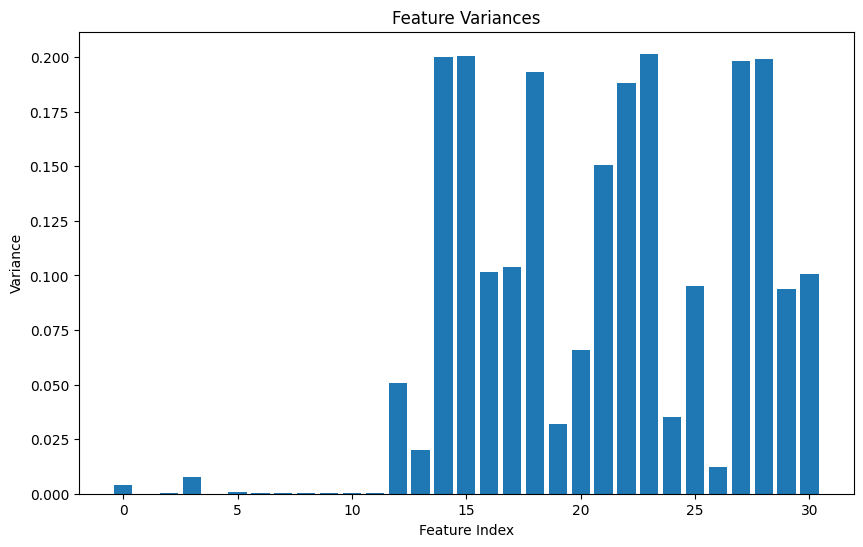

In [7]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

####################################
# Your code here
scaler = MinMaxScaler()

# Fit the scaler on the original training data
scaler.fit(train_X)

# Transform the training data to the range [0, 1]
X_train_scaled = scaler.transform(train_X)


# Print scaled
print(X_train_scaled)

# Calculate the variances of the features along axis 0
variances = np.var(X_train_scaled, axis=0)

# Plot the variances
plt.figure(figsize=(10, 6))
plt.bar(range(len(variances)), variances)
plt.xlabel('Feature Index')
plt.ylabel('Variance')
plt.title('Feature Variances')
plt.show()

# Fit the output of the `MinMaxScaler`
selector_V = VarianceThreshold(threshold=0.1)
selector_V.fit(X_train_scaled)

X_train_selector_scaled = selector_V.transform(train_X_scaled)
X_test_selector_scaled = selector_V.transform(test_X_scaled)




In [8]:
from sklearn.svm import SVC

# Create an SVC model with a linear kernel
model_2 = SVC(kernel='linear')

# Fit the model to the training data
model_2.fit(X_train_selector_scaled, train_Y)

# Prediction
prediction_V = model_2.predict(X_test_selector_scaled)

# Calculate the confusion matrix
confusion_V = confusion_matrix(test_Y, prediction_V)

# Calculate the accuracy score
accuracy_V = accuracy_score(test_Y, prediction_V)

# Print the confusion matrix and accuracy score
print("Confusion Matrix:")
print(confusion_V)

print("Accuracy Score:", accuracy_V)

Confusion Matrix:
[[9620   20   71    0    0]
 [2163 5388   85    0    0]
 [ 854  793  776    0    0]
 [2549    7   18    0    0]
 [  79    1  120    0    0]]
Accuracy Score: 0.7001419446415897


<span style="color:red">Insert your text answers below</span>.

7. The Accuracy is a little bit lower as compared to part 1. The higher the threshold the lower the accuracy is as compared to part 1 because a higher threshold deducts more features.

### Part 3: Univariate Feature Selection - `f_classif`

Univariate feature selection works by performing statistical tests on each of the features (i.e. on each column in our dataset). There are a [few options provided by `scikit-learn`](https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection). We will use the [`SelectKBest` functionality](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html), which allows us to pick "the top" `K` features per the metric we select. To pick the top features, we will use the [`f_classif` function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html), as we are doing a classification. `f_classif` uses the ANOVA F-value to determine features to select. More info on ANOVA is available [here](https://datascience.stackexchange.com/questions/74465/how-to-understand-anova-f-for-feature-selection-in-python-sklearn-selectkbest-w).

The `SelectKBest` functionality coupled with `f_classif`, will use this score to pick the `K` top features.

#### Task:
1. Loop over the total count of features (i.e. for variable `k` from 1 to 31)
2. Use the [`SelectKBest` class](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [`f_classif`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html) to pick the top `k` features from our dataset
3. Train a new SVM classification with features transformed with the `SelectKBest` object you just created (note: both train and test data have to be transformed)
4. Use the `accuracy_score` function to get the accuracy at each iteration
5. Repeat steps 2 to 4 for each value of `k`.
6. Then plot the accuracy versus number of features in a single plot
7. Given this data, discuss the number of features you might use in a final solution? (Use markdown - no wrong answer here)
8. How doe the "best" accuracy value compare with the SVM before removing any features? 

this will take a few minutes to run, go get a coffee!

<span style="color:red">Insert your code below</span>.

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

####################################
# Your code here
# Loop over the total count of features (31 in this case)
accuracies = []
for k in range(1, 32):
     
    selector = SelectKBest(score_func=f_classif, k=k)
    train_X_selectedk = selector.fit_transform(train_X, train_Y)
    test_X_selectedk = selector.transform(test_X)

    # Step 2: Train SVM classifier
    svm_dk = SVC()
    svm_dk.fit(train_X_selectedk, train_Y)

    # Step 3: Make predictions on test data
    predictions_selected = svm_dk.predict(test_X_selectedk)

    # Step 4: Calculate accuracy
    accuracy = accuracy_score(test_Y, predictions_selected)
    accuracies.append(accuracy)
    print(f'k={k}: Accuracy={accuracy}')



k=1: Accuracy=0.6269517388218595
k=2: Accuracy=0.6274396735273243
k=3: Accuracy=0.6419002838892832
k=4: Accuracy=0.6438076650106459
k=5: Accuracy=0.6460699077359829
k=6: Accuracy=0.6477111426543648
k=7: Accuracy=0.6024219304471257
k=8: Accuracy=0.647888573456352
k=9: Accuracy=0.6479329311568488
k=10: Accuracy=0.6479329311568488
k=11: Accuracy=0.6529453513129879
k=12: Accuracy=0.6526348474095103
k=13: Accuracy=0.6527679205110007
k=14: Accuracy=0.6526348474095103
k=15: Accuracy=0.6524130589070263
k=16: Accuracy=0.6525017743080199
k=17: Accuracy=0.6523243435060326
k=18: Accuracy=0.6523687012065295
k=19: Accuracy=0.6523243435060326
k=20: Accuracy=0.6521912704045423
k=21: Accuracy=0.6113821859474805
k=22: Accuracy=0.4304914833215046
k=23: Accuracy=0.4304914833215046
k=24: Accuracy=0.4304914833215046
k=25: Accuracy=0.4304914833215046
k=26: Accuracy=0.4304914833215046
k=27: Accuracy=0.4304914833215046
k=28: Accuracy=0.4304914833215046
k=29: Accuracy=0.43066891412349184
k=30: Accuracy=0.430668

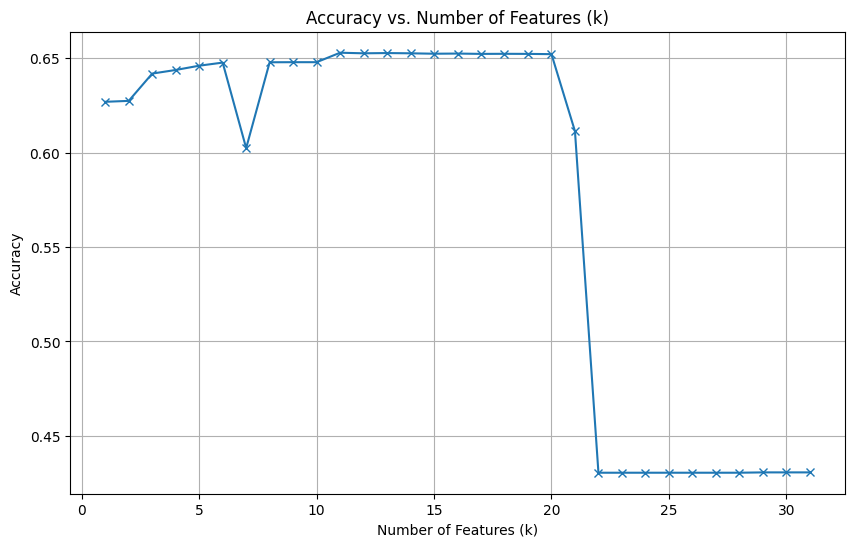

In [13]:
import matplotlib.pyplot as plt

####################################
# Your code here
# Plot the accuracy versus k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 32), accuracies, marker='x', linestyle='-')
plt.title('Accuracy vs. Number of Features (k)')
plt.xlabel('Number of Features (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


<span style="color:red">Insert your question answers below</span>.

7. I might use 21 features for my final solution, which are all above 0.6 accuracy
8. The best accuracy (0.6527679205110007) is significantly lower than the accuracy before features are removed (0.7308818310858765)

# Task 2: Dimensionality Reduction via PCA

PCA is one of the most commonly used unsupervised transforms, and one of the most commmon means to manipulate data for machine learning. You touched on the PCA in E-tivity 2, where we investigated linear algebra. Here we will use it to reduce the numbers of features needed for a machine learning algorithm.

In the last task, we removed features. The first part, we just used some statistics on the features themselves, in independence of the other features and of the output. Then, we looked at the correlation between features and the output. 

What PCA does is look at correlations *between features*. If we have high correlation between two or more features, PCA will find vectors in the feature space that best describe all features. It doesn't remove features, rather it creates a new feature space, and projects all samples to this feature space. The basis of the new feature space is a linear combination of the original features. Maybe a bit crudely, you can think of it as combining features.

Let's look at an example. Here is the first few rows of the dataset.

In [9]:
train_df.head(8)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_category,attack_binary
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,benign,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,benign,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,benign,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,benign,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,dos,1


Ok, so in a small handfull of features, we can spot that (perhaps) `num_root` and `num_compromised` are correlated? Let's plot a few of them that might be correlated.

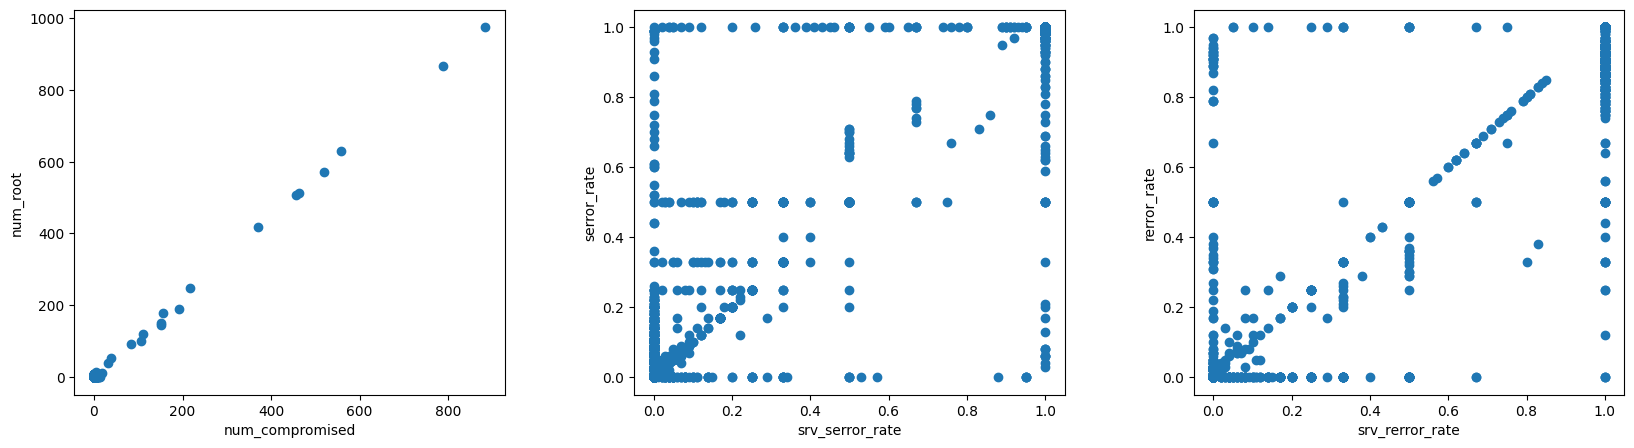

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.subplots_adjust(wspace=0.3)

ax[0].scatter(train_df['num_compromised'], train_df['num_root']);
ax[0].set(xlabel='num_compromised', ylabel='num_root')

ax[1].scatter(train_df['srv_serror_rate'], train_df['serror_rate']);
ax[1].set(xlabel='srv_serror_rate', ylabel='serror_rate')

ax[2].scatter(train_df['srv_rerror_rate'], train_df['rerror_rate']);
ax[2].set(xlabel='srv_rerror_rate', ylabel='rerror_rate')

plt.show()

Note that the last two plots, while there are outliers in the plots (values at 1.0), most of the data lies along the diagonal. Just the drawing doesn't show this well, though it is highly correlated.

Yes, we can see that there is some correlation between the features we selected here. We can probably assume that there is a causal relationship between them - CyberSecurity specialists wish to comment?

So there is certainly some redundancy here. And likely there are more hidden correlations that we don't know about!

# Task

On to this weeks task. We will perform PCA on the data, before training a linear SVM, and explore some more properties of it, and how it affects the machine learning algorithm.

1. Run [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on the standard scaled data. Initially, set the desired variance to keep to 95% (`n_components=0.95`, all other parameters set to default)
2. Train a Support Vector Classification on the PCA reduced data. As with Task 1, use a linear SVM and keep all other parameters as default
3. Try 99% and 90%
4. Play around with desired variance to see if you can reduce the number of features while maintaining an accuracy close to the original dataset above

Discuss the following points, and compare with the previous task in this e-tivity:

1. How many new features are there after the PCA?
2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
3. How about if we set the variance to 99%? And how about 99.9%?
4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?

Note that the parameter `n_components` of `PCA` can take either a real value between 0 and 1, in which case it will pick the number of components that maintains that level of variance in the samples, or it can take an integer value, in which case it will keep that number of components.

<span style="color:red">Insert your code below</span>.

In [24]:
from sklearn.decomposition import PCA

####################################
# Your code here
pca = PCA(n_components=0.95)

train_X_pca = pca.fit_transform(train_X_scaled)
test_X_pca = pca.transform(test_X_scaled)

svm_pca = SVC(kernel='linear')
svm_pca.fit(train_X_pca, train_Y)

num_new_features = train_X_pca.shape[1]
print(f'Number of new features after PCA: {num_new_features}')

Number of new features after PCA: 19


In [21]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

####################################
# Your code here
predictions_pca = svm_pca.predict(test_X_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(test_Y, predictions_pca)
print('Accuracy for 95% variance:',accuracy_pca)


Accuracy for 95% variance: 0.7278655074520937


In [23]:
####################################
# Your code here

# Keep 99% of the variance
predictions_pca = svm_pca.predict(test_X_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(test_Y, predictions_pca)
print('Accuracy for 99% variance:', accuracy_pca)


Accuracy for 99% variance: 0.7301721078779276


In [25]:
####################################
# Your code here

# Keep 99.9% of the variance
predictions_pca = svm_pca.predict(test_X_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(test_Y, predictions_pca)
print('Accuracy for 99.9% variance:', accuracy_pca)

Accuracy for 99.9% variance: 0.7297728885734563


In [27]:
####################################
# Your code here

# Keep 90% of the variance
predictions_pca = svm_pca.predict(test_X_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(test_Y, predictions_pca)
print('Accuracy for 90% variance:', accuracy_pca)

Accuracy for 90% variance: 0.7263129879347054


Created a for loop that tests out different variances from 0.5 to 0.99 and plot a graph below

variance_ratio=0.5: Accuracy=0.717042228530873
variance_ratio=0.51: Accuracy=0.717042228530873
variance_ratio=0.52: Accuracy=0.7141146202980837
variance_ratio=0.53: Accuracy=0.7141146202980837
variance_ratio=0.54: Accuracy=0.7141146202980837
variance_ratio=0.55: Accuracy=0.7141146202980837
variance_ratio=0.56: Accuracy=0.718417317246274
variance_ratio=0.57: Accuracy=0.718417317246274
variance_ratio=0.58: Accuracy=0.718417317246274
variance_ratio=0.59: Accuracy=0.718417317246274
variance_ratio=0.6: Accuracy=0.718417317246274
variance_ratio=0.61: Accuracy=0.7225869410929737
variance_ratio=0.62: Accuracy=0.7225869410929737
variance_ratio=0.63: Accuracy=0.7225869410929737
variance_ratio=0.64: Accuracy=0.7283977998580553
variance_ratio=0.65: Accuracy=0.7283977998580553
variance_ratio=0.66: Accuracy=0.7283977998580553
variance_ratio=0.67: Accuracy=0.7283977998580553
variance_ratio=0.68: Accuracy=0.7177075940383251
variance_ratio=0.69: Accuracy=0.7177075940383251
variance_ratio=0.7: Accuracy=

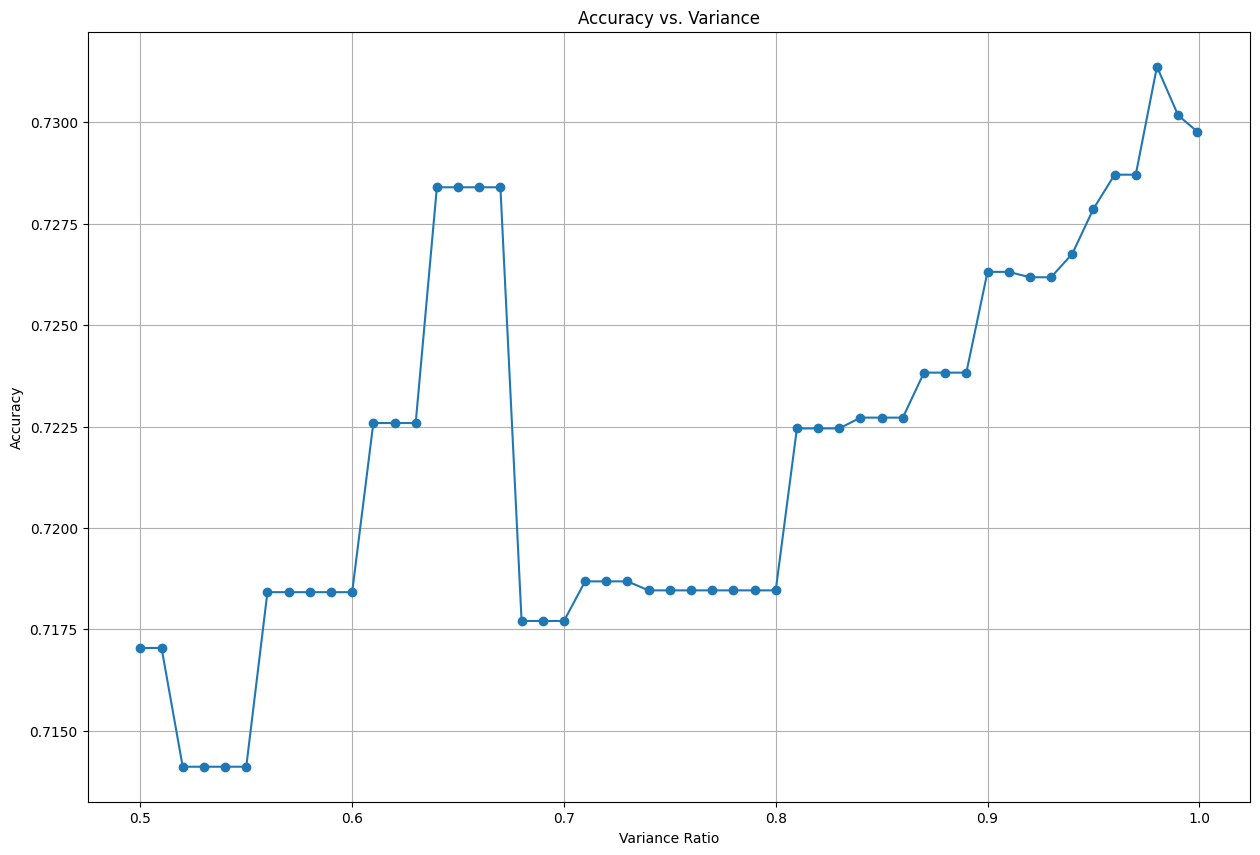

In [14]:
# Created a for loop that tests out different variances from 0.5 to 0.99 and plot a graph below
pca_accuracies = []
variance_ratios = [0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 
0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 
0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 
0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 
0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 0.999]

for variance_ratio in variance_ratios:
     
   pca_loop = PCA(n_components=variance_ratio)

   train_X_pca = pca_loop.fit_transform(train_X_scaled)
   test_X_pca = pca_loop.transform(test_X_scaled)

   svm_pca_loop = SVC(kernel='linear')
   svm_pca_loop.fit(train_X_pca, train_Y)
   predictions_pca_loop = svm_pca_loop.predict(test_X_pca)

   # Calculate accuracy
   accuracy_pca_loop = accuracy_score(test_Y, predictions_pca_loop)
   pca_accuracies.append(accuracy_pca_loop)
   print(f'variance_ratio={variance_ratio}: Accuracy={accuracy_pca_loop}')

####################################
# Your code here
plt.figure(figsize=(15, 10))
plt.plot(variance_ratios, pca_accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Variance')
plt.xlabel('Variance Ratio')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

<span style="color:red">Insert your text answers below</span>.

1. How many new features are there after the PCA?

   With n_components set to 0.95, PCA should retain enough components to account for 95% of the variation in the data.
   I examined the n_components_ attribute of the fitted PCA object to determine the number of additional features that result from the PCA transformation.
   After the PCA transformation, the number of new features will be provided by the train_X_pca.shape[1]. The number of primary components that were kept in order to account for 95% of the variation in the initial data is represented by this number. Number of new features after PCA(n_components = 0.95) is 19. But without assigning a variance PCA() the number of new features is 31.

2. Discuss the "goodness" of the model, compared with the one without scaling (from Task 1), by comparing the accuracy
   
   PCA with Standard Scaling has a higher accuracy as indicated by the results above. The accuracies for PCA range from 0.71 to 0.73 basically and the accuracies of the un-scaled data in Task 1 Univariate Feature Selection range from 0.43 to 0.652. It indicates that the preprocessing steps, including scaling and dimensionality reduction using PCA, have improved the model's performance. Therefore i consider this model to be good.  

3. How about if we set the variance to 99%? And how about 99.9%?

   When the variance is set to 99% the accuracy is 0.7301721078779276 and when the variance is set to 99.9% the accuracy drops to               0.7297728885734563 which is a difference of approximately 0.0003992193044713 (error index). This may be due to overfitting, overfitting may result from keeping too many components (nearer to the initial number of features). When a model overfits, it becomes less accurate because it may not generalise effectively to new data after learning the noise in the training set.

4. Can you get better accuracy with fewer features using PCA compared to dropping the features from Task 1?
   
   Yes, I get a better accuracy with fewer features in PCA and compared to droping features in Task 1. A PCA variancy of 0.50 gave (has 4 features) gave me a an accuracy of 0.717042228530873, however in feature varience in task 1, when i assigned a variance threshold of 0.1 the accuracy was 0.7001419446415897.






# Task 3: Exploration

## Feature Selection
### Feature Importance from Tree-based Models
The fitted attribute feature_importances_ provides the feature importances, which are computed as the mean and standard deviation of the impurity decrease accumulation within each tree. When it comes to features with high cardinality (many unique values), impurity-based feature importances might be deceptive[1]. Value of Features Based on Tree-based In scikit-learn, the term "models" refers to a method for evaluating how each individual feature affects the predictive ability of decision tree-based models, like Gradient Boosting Machines or Random Forests. These models divide the input at each node using characteristics to create hierarchical tree structures upon which to base their judgements. When building the trees, a feature's significance is determined by how well it reduces impurity or increases information acquisition. A trained tree-based model in scikit-learn yields a ranked list of feature importances; higher values denote greater significance. This is done via the feature_importances_ property. A sample code is provided below attached to the current dataset:

In [13]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier()
model_forest.fit(train_X_scaled, train_Y)
feature_importances = model_forest.feature_importances_
print(feature_importances.shape)

(31,)


### L1 Regularization (LASSO)
L1 Regularisation, sometimes referred to as LASSO (Least Absolute Shrinkage and Selection Operator), is a regularisation method used in scikit-learn for linear models that creates sparsity in the feature space and inhibits overfitting. The linear regression cost function gains a new term in L1 Regularisation that is proportionate to the absolute values of the model coefficients[2]. During training, the total of the absolute values of the coefficients is penalised by this regularisation term. Thus, feature selection is effectively carried out via L1 Regularisation, which has a tendency to drive some of the coefficients exactly to zero. The regularisation strength hyperparameter (alpha) regulates the level of regularisation. Greater regularisation and a greater number of zeroed-out coefficients are associated with larger alpha values. When a dataset has a large number of characteristics, LASSO can be especially helpful since it can automatically discover and choose the most pertinent features for prediction, making the model easier to understand and more straightforward. A sample code is provided below attached to the current dataset:


In [14]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty='l1', solver='liblinear')
model_lr.fit(train_X, train_Y)


LogisticRegression(penalty='l1', solver='liblinear')

### Mutual Information
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency[3]. It is implemented in scikit-learn. Mutual Information is a tool used in feature selection that quantifies the information shared between a feature and the target variable[3]. Mutual information, taking into account both linear and non-linear interactions, can assist in identifying features for classification tasks that are helpful for predicting the target class. Greater mutual information values signify more robust dependencies. The mutual_info_classif function from Scikit-learn can be used to determine the mutual information in a classification setting between each feature and the target variable. This measure is a flexible tool since it is especially helpful in situations when the relationships between the features and the target variable are complex and may not be well-captured by linear correlations. A sample code is provided below attached to the current dataset:



In [16]:
from sklearn.feature_selection import mutual_info_classif

scores_mi = mutual_info_classif(train_X, train_Y)
print(scores_mi)

[0.05654485 0.71149937 0.45978288 0.01465508 0.00439159 0.01931402
 0.00312419 0.00673696 0.00547683 0.         0.00351747 0.00276446
 0.41678999 0.15901998 0.38689177 0.35588741 0.07179282 0.05600302
 0.46175294 0.50431986 0.14501042 0.21150026 0.41576118 0.40328533
 0.45411998 0.2380439  0.25469166 0.39665226 0.37370327 0.08878863
 0.08159396]


## Dimensionality reduction
### t-Distributed Stochastic Neighbor Embedding (t-SNE)
It is a popular non-linear dimensionality reduction method for visualising high-dimensional data in a lower-dimensional environment, usually two or three dimensions, is called t-Distributed Stochastic Neighbour Embedding, or t-SNE[4]. Because it maintains the local associations between data points in the original space, t-SNE—which was developed by Laurens van der Maaten and Geoffrey Hinton—is especially useful for identifying patterns and clusters. In both the high-dimensional and low-dimensional spaces, the technique models pairwise similarities between data points and transforms the data in a way that highlights global structures while preserving the relative distances of neighbouring points[4]. As a significant tool for exploratory data analysis and understanding the underlying patterns of complex datasets, t-SNE excels in capturing complicated, non-linear correlations and is particularly helpful for visualising intricate structures in datasets, in contrast to linear methods like PCA. It is crucial to remember that t-SNE requires a lot of computing power and might not always maintain global structure as well as linear techniques. A sample code is provided below attached to the current dataset:


In [19]:
from sklearn.manifold import TSNE

# Create a t-SNE model
tsne = TSNE(n_components=2, random_state=42).fit_transform(train_X_scaled)
print(tsne.shape)


(25192, 2)


### Uniform Manifold Approximation and Projection (UMAP)
UMAP is a relatively newer technique that combines elements of both linear and non-linear dimensionality reduction. It is known for preserving both local and global structure in the data. Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can be used for visualisation similarly to t-SNE, but also for general non-linear dimension reduction[5]. The algorithm is founded on three assumptions about the data:

1. The data is uniformly distributed on a Riemannian manifold;
2. The Riemannian metric is locally constant (or can be approximated as such);
3. The manifold is locally connected.


In [ ]:
from umap import UMAP

# Create a UMAP model
umap_model = UMAP(n_components=2, random_state=42)

# Fit and transform the data
train_X_umap = umap_model.fit_transform(train_X_scaled)
test_X_umap = umap_model.transform(test_X_scaled)

### Conclusion
It is crucial to apply diverse feature selection and dimensionality reduction strategies in machine learning since distinct datasets and situations may call for customised solutions to address particular difficulties. There isn't a single approach that works well in every situation. Selecting features improves model interpretability, lowers computational cost, and finds the most informative features. High-dimensional data can be transformed into a lower-dimensional space using dimensionality reduction techniques like PCA, t-SNE, and UMAP, which capture pertinent patterns and structures. The goals of the machine learning challenge, the underlying relationships between features, and the type of data all influence the technique selected. Through the investigation of various approaches, professionals can acquire a deeper understanding of the data, enhance model functionality, and address problems such as overfitting, multicollinearity, and computational inefficiencies. 

### Sources
[1]. https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#:~:text=Feature%20importances%20are%20provided%20by,impurity%20decrease%20within%20each%20tree.&text=Impurity%2Dbased%20feature%20importances%20can,features%20(many%20unique%20values).

[2]. https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

[3]. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

[4]. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

[5]. https://github.com/lmcinnes/umap